In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math


In [2]:
Npoints = 300
class1 = np.zeros((Npoints, 3))
for row in class1:
    radius = rand.random() - 0.5
    theta = rand.random()*2*math.pi
    x = radius*math.cos(theta)
    y = radius*math.sin(theta)
    row[0] =x
    row[1] = y

class1[:,2] = np.ones(Npoints)*-1

class2 = np.zeros((Npoints, 3))

for row in class2:
    theta = rand.random()*2*math.pi
    radius = rand.uniform(0.6, 1)
    x = radius*math.cos(theta)
    y = radius*math.sin(theta)
    row[0] = x
    row[1] = y
    
class2[:, 2] = np.ones(Npoints)    

dataset = np.append(class1, class2).reshape(Npoints*2,3)
np.random.shuffle(dataset)

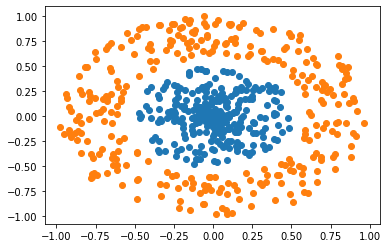

In [3]:
plt.plot(class1[:, 0], class1[:,1], 'o')
plt.plot(class2[:, 0], class2[:,1], 'o')
plt.show()

In [4]:
def normalizeWeights(weights):
    weights = weights / np.sum(weights)
    return weights

def learn(dataset, weights):
    inputs= dataset[:, :2]
    phi = np.ones((inputs.shape[0], inputs.shape[1]+1))
    phi[:, 1:3] = inputs
    phiT = phi.transpose()
    t = dataset[:, 2]
    #w = np.linalg.inv(phiT.dot(phi)).dot(phiT).dot(dataset[:,2])
    w = np.linalg.inv(phiT@phi)@phiT@(t)
    return w


def learnPerc(dataset, weights, iters):
    w = np.random.rand(3)*5 -2.5#w0 and w1 adn w2

    k = 0
    while(calculateError(dataset, w, weights) >0.5 or k < iters):
        n = k % dataset.shape[0]
        row = dataset[n]
        x = np.array([1, row[0], row[1]])
        c = dataset[n][2]
        if (calculateFunction(w, x))*(c) <0:
            w = w + x *c * weights[n]
        if(k == iters):
            print("Error rate is limitating the loop")
        k = k+1
    return w    


def calculateError(dataset, w, weights):
    error = 0
    for i in range(dataset.shape[0]):
        row = dataset[i]
        x = np.array([1, row[0], row[1]])
        y = calculateFunction(w, x)
        if y > 0:
            c = 1
        else:
            c = -1
        #se c'è il segno negativo, significa che sto missclassificando, quindi aggiungo il peso
        #del sample
        if c*dataset[i][2] < 0:
            error = error + weights[i]
    
    return error

def updateWeights(weights, w, beta, dataset):
    for j in range(weights.shape[0]):
        row = dataset[j]
        x = np.array([1, row[0], row[1]])
        y = calculateFunction(w, x)
        if y > 0:
            c = 1
        else:
            c = -1
            
        #se lo ho classificato giusto, il peso diminuisce (beta tra 0 e 1)    
        if c*dataset[j][2] > 0:
            weights[j] = weights[j]*beta
    return weights        
        
def calculateFunction(w, x):
    return w.transpose()@x
    
T = 41
i = 0
learners = []
betas = []
weights = np.ones(dataset.shape[0])/dataset.shape[0]
while(i < T):
    print("Epoch {}".format(i))
    weights =normalizeWeights( weights)
    w = learnPerc(dataset, weights, dataset.shape[0]*3)
    print("Parameters {}".format(w))
    error = calculateError(dataset, w, weights)
    print(error)
    if error >0.5:
        print("Exiting at epoch {}".format(i))
        break
    beta = error/(1 - error)
    weights = updateWeights(weights, w, beta, dataset)
    
    learners.append(w)
    betas.append(beta)
    i += 1 

print("Fine")


Epoch 0
Parameters [-0.6397935   0.59734723 -2.06981536]
0.3866666666666659
Epoch 1
Error rate is limitating the loop
Parameters [ 0.09119178 -1.40839408  0.21642038]
0.4993909295352294
Epoch 2
Error rate is limitating the loop
Parameters [ 0.1484551  -0.94306209  0.80704923]
0.49774071645347884
Epoch 3
Parameters [-0.64629078 -1.49313992  2.0904544 ]
0.32786116332220716
Epoch 4
Error rate is limitating the loop
Parameters [-0.00029498 -0.00494471  0.0242242 ]
0.4890364519331919
Epoch 5
Error rate is limitating the loop
Parameters [0.02078447 0.28618496 0.01728072]
0.4991112631254946
Epoch 6
Parameters [-0.00085526  0.00187931 -0.00174   ]
0.42650202065627313
Epoch 7
Error rate is limitating the loop
Parameters [ 0.02451423 -0.04105211  0.00603074]
0.4814410852884909
Epoch 8
Error rate is limitating the loop
Parameters [0.00116916 0.01358458 0.04254637]
0.48391215481478894
Epoch 9
Parameters [-0.20444612  1.00850483  0.38434419]
0.4159286559018336
Epoch 10
Parameters [-0.49786053 -0.67

<IPython.core.display.Javascript object>


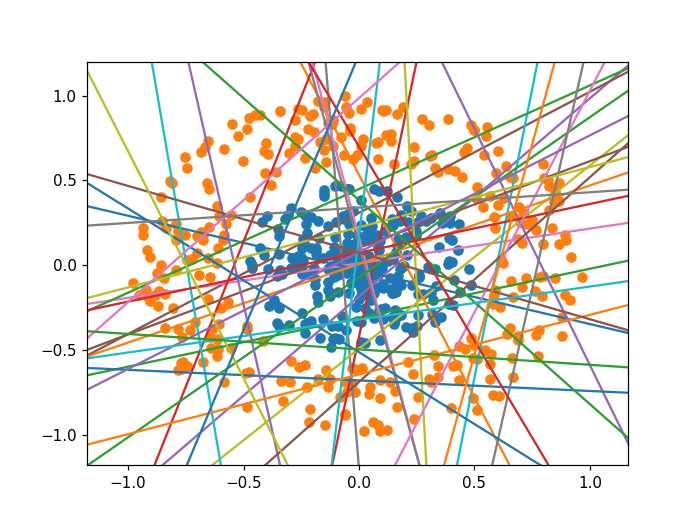

In [5]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()


fig.show()
fig.canvas.draw()

def drawLine(w,ax):
    x1 = 2
    y1 = (-w[1]*x1-w[0])/w[2]
    x2 = -2
    y2 = (-w[1]*x2-w[0])/w[2]
    ax.plot([x1, x2], [y1, y2])
    fig.canvas.draw()
    plt.pause(0.2)
    

ax.plot(class1[:, 0], class1[:,1], 'o')
ax.plot(class2[:, 0], class2[:,1], 'o')
plt.xlim(np.min(dataset[:,0]-0.2), np.max(dataset[:,0])+0.2)
plt.ylim(np.min(dataset[:,1])-0.2, np.max(dataset[:,1])+0.2)
for learner in learners:
    drawLine(learner,ax)

In [6]:
def predictClass(learners, dataset):
    prediction = np.zeros(dataset.shape[0])
    i=0
    for row in dataset:
        c1 = 0 # 1
        c2 = 0 # -1
        x = np.array([1, row[0], row[1]])
        for learner in learners:
            w = learner
            y = calculateFunction(w, x)
            if(y>0):
                c1 +=1
            else:
                c2 += 1
        if c1 > c2:
            prediction[i] =1
        else:
            prediction[i] = -1
        i +=1
    return prediction    

prediction = predictClass(learners, dataset)
predDat = np.ones((dataset.shape[0], dataset.shape[1]+1))
predDat[:,:3] = dataset
predDat[:,3] = prediction

class1 = predDat[predDat[:,2] == -1][:,:3]
missClass1 = predDat[predDat[:,2] != predDat[:,3]]
missClass1 = missClass1[missClass1[:,2]==-1]

class2 = predDat[predDat[:,2] == 1][:,:3]
missClass2 = predDat[predDat[:,2] != predDat[:,3]]
missClass2 = missClass2[missClass2[:,2]==1]


<IPython.core.display.Javascript object>


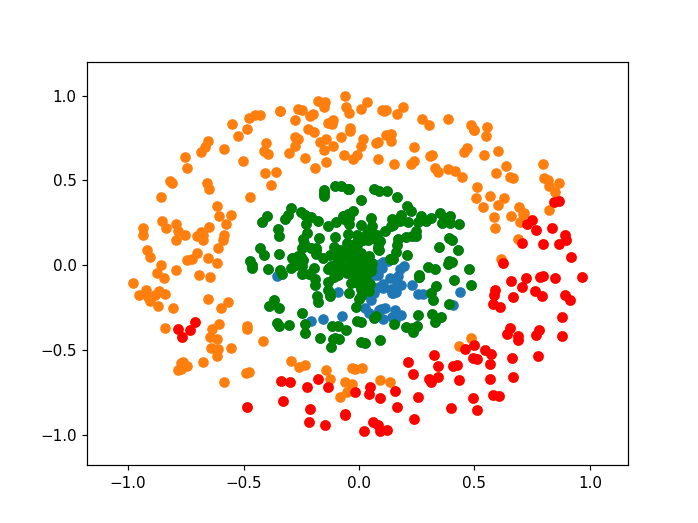

In [7]:
fig, ax = plt.subplots()
plt.xlim(np.min(dataset[:,0]-0.2), np.max(dataset[:,0])+0.2)
plt.ylim(np.min(dataset[:,1])-0.2, np.max(dataset[:,1])+0.2)
plt.plot(class1[:,0], class1[:,1], "o")
plt.plot(class2[:,0], class2[:,1], "o")
plt.plot(missClass1[:,0], missClass1[:,1], "o", color = "green")
plt.plot(missClass2[:,0], missClass2[:,1], "o", color = "red")
plt.show()

In [8]:
datSize = dataset.shape[0]
miss = missClass1.shape[0]+missClass2.shape[0]
print("Total points: {}. Misclassified points: {}.\nMissclassification rate: {}".format(datSize, miss, miss/datSize))

Total points: 600. Misclassified points: 344.
Missclassification rate: 0.5733333333333334


In [9]:
learnersNumber = len(learners)
x = np.arange(1, learnersNumber+1)
error = np.zeros(learnersNumber)
for i in x:
    prediction = predictClass(learners[:i], dataset)
    
    predDat = np.ones((dataset.shape[0], dataset.shape[1]+1))
    predDat[:,:3] = dataset
    predDat[:,3] = prediction

    class1 = predDat[predDat[:,2] == -1][:,:3]
    missClass1 = predDat[predDat[:,2] != predDat[:,3]]
    missClass1 = missClass1[missClass1[:,2]==-1]

    class2 = predDat[predDat[:,2] == 1][:,:3]
    missClass2 = predDat[predDat[:,2] != predDat[:,3]]
    missClass2 = missClass2[missClass2[:,2]==1]
    datSize = dataset.shape[0]
    miss = missClass1.shape[0]+missClass2.shape[0]
    error[i-1] = miss/datSize

<IPython.core.display.Javascript object>


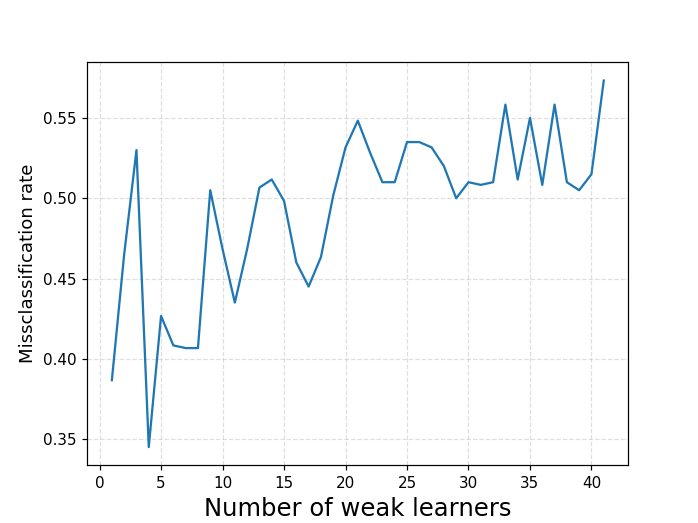

In [10]:
fig, ax = plt.subplots()
plt.plot(x, error)
plt.xlabel('Number of weak learners', fontsize=16)
plt.ylabel('Missclassification rate', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.show()

test set. to have some idea about performance

In [11]:
Npoints = 500
class1 = np.zeros((Npoints, 3))
for row in class1:
    radius = rand.random() - 0.5
    theta = rand.random()*2*math.pi
    x = radius*math.cos(theta)
    y = radius*math.sin(theta)
    row[0] =x
    row[1] = y

class1[:,2] = np.ones(Npoints)*-1

class2 = np.zeros((Npoints, 3))

for row in class2:
    theta = rand.random()*2*math.pi
    radius = rand.uniform(0.6, 1)
    x = radius*math.cos(theta)
    y = radius*math.sin(theta)
    row[0] = x
    row[1] = y
    
class2[:, 2] = np.ones(Npoints) 
testSet= np.append(class1, class2).reshape(Npoints*2,3)

<IPython.core.display.Javascript object>


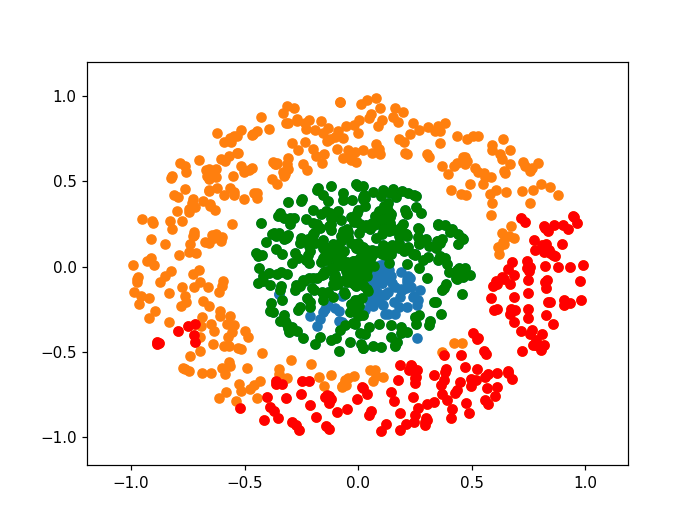

In [12]:
prediction = predictClass(learners, testSet)
predDat = np.ones((testSet.shape[0], testSet.shape[1]+1))
predDat[:,:3] = testSet
predDat[:,3] = prediction

class1 = predDat[predDat[:,2] == -1][:,:3]
missClass1 = predDat[predDat[:,2] != predDat[:,3]]
missClass1 = missClass1[missClass1[:,2]==-1]

class2 = predDat[predDat[:,2] == 1][:,:3]
missClass2 = predDat[predDat[:,2] != predDat[:,3]]
missClass2 = missClass2[missClass2[:,2]==1]

fig, ax = plt.subplots()
plt.xlim(np.min(testSet[:,0]-0.2), np.max(testSet[:,0])+0.2)
plt.ylim(np.min(testSet[:,1])-0.2, np.max(dataset[:,1])+0.2)
plt.plot(class1[:,0], class1[:,1], "o")
plt.plot(class2[:,0], class2[:,1], "o")
plt.plot(missClass1[:,0], missClass1[:,1], "o", color = "green")
plt.plot(missClass2[:,0], missClass2[:,1], "o", color = "red")
plt.show()

In [13]:
datSize = testSet.shape[0]
miss = missClass1.shape[0]+missClass2.shape[0]
print("TEST SET\nTotal points: {}. Misclassified points: {}.\nMissclassification rate: {}".format(datSize, miss, miss/datSize))

TEST SET
Total points: 1000. Misclassified points: 608.
Missclassification rate: 0.608


<IPython.core.display.Javascript object>


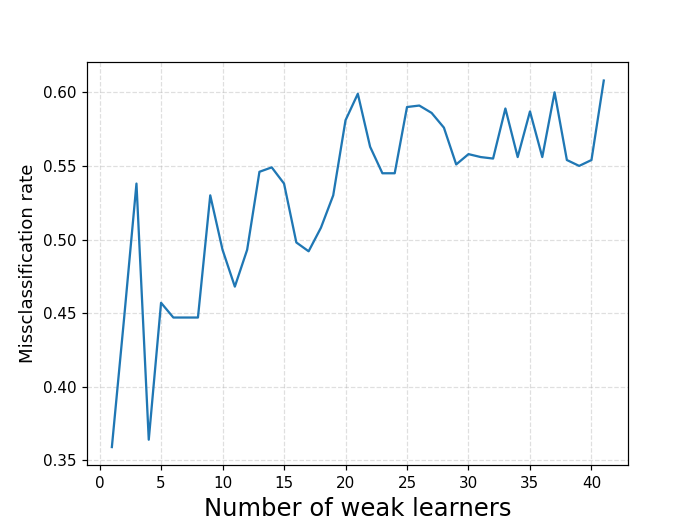

In [14]:
learnersNumber = len(learners)
x = np.arange(1, learnersNumber+1)
error = np.zeros(learnersNumber)
for i in x:
    prediction = predictClass(learners[:i], testSet)
    
    predDat = np.ones((testSet.shape[0], testSet.shape[1]+1))
    predDat[:,:3] = testSet
    predDat[:,3] = prediction

    class1 = predDat[predDat[:,2] == -1][:,:3]
    missClass1 = predDat[predDat[:,2] != predDat[:,3]]
    missClass1 = missClass1[missClass1[:,2]==-1]

    class2 = predDat[predDat[:,2] == 1][:,:3]
    missClass2 = predDat[predDat[:,2] != predDat[:,3]]
    missClass2 = missClass2[missClass2[:,2]==1]
    datSize = testSet.shape[0]
    miss = missClass1.shape[0]+missClass2.shape[0]
    error[i-1] = miss/datSize
fig, ax = plt.subplots()
plt.plot(x, error)
plt.xlabel('Number of weak learners', fontsize=16)
plt.ylabel('Missclassification rate', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.show()    